<a href="https://colab.research.google.com/github/shivaniman/CS/blob/main/Copy_of_Project_04_04_23_pyb_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('/content/BankChurners.csv')

In [24]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [26]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)

In [27]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [29]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<ipython-input-30-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

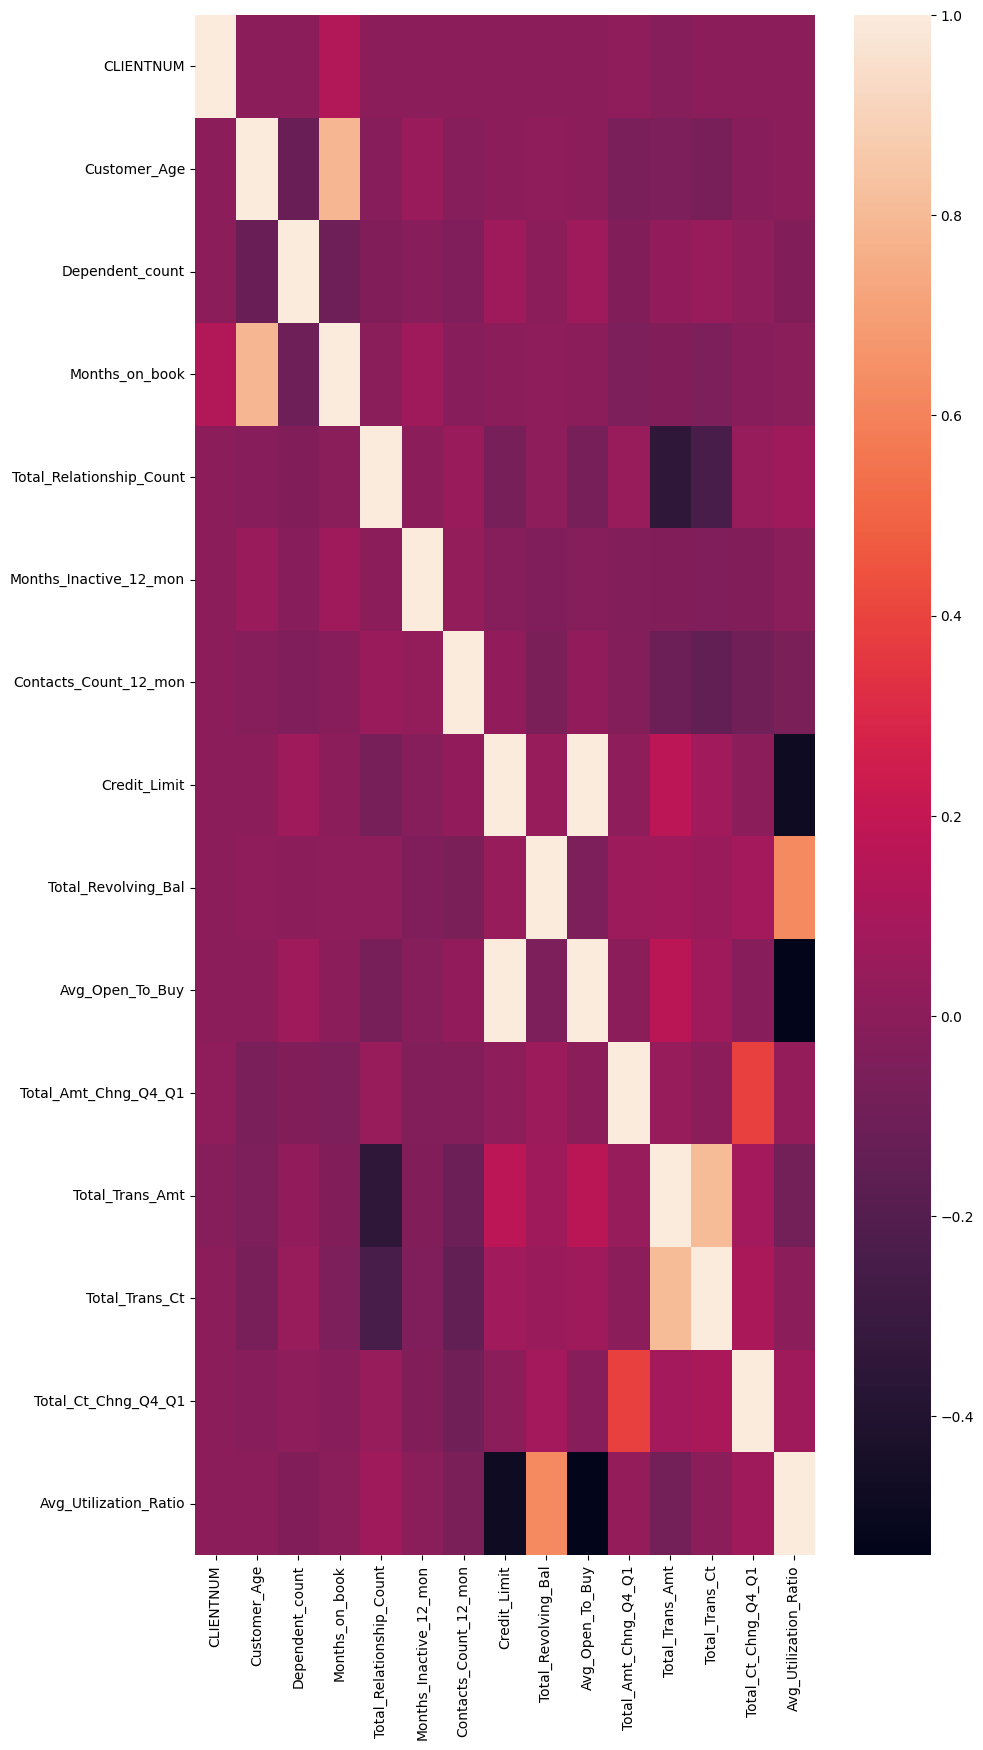

In [30]:
sns.heatmap(df.corr())

In [31]:
# plt.plot[]

In [32]:
#we have plotted all the plots in same cell
plt.rcParams["figure.figsize"]=(10,20)
df.plot(kind="box",subplots="True",layout=(10,3)),
plt.show()

ValueError: ignored

In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)
plt.show()

In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'Set2', data = df)
plt.show()

In [ ]:
#sns.distplot(df['Attrition_Flag'])
df['Attrition_Flag'] = df.Attrition_Flag.map({'Attrited Customer': 1,'Existing Customer': 0})
df.head()

In [ ]:
sns.distplot(df['Attrition_Flag'])


In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)
plt.show()

In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Card_Category', palette = 'Set2', data = df)
plt.show()

In [ ]:
plt.figure(figsize = (20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education_Level', palette = 'Set2', data = df)
plt.show()

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
plt.tight_layout()
df.loc[:, ~df.columns.isin(['CLIENTNUM', "Attrition_Flag_Int"])].hist(ax = ax)
fig.show()

In [ ]:
correlation = df.loc[:, ~df.columns.isin(['CLIENTNUM'])].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
plt.show()

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)

In [ ]:
df.head()

In [ ]:
df.drop('CLIENTNUM',inplace=True,axis=1)

In [ ]:
df.info()

In [ ]:
a=df['Income_Category']
a.unique()

In [ ]:
df['Income_Category'].value_counts()

In [ ]:
df['Income_Category']=df['Income_Category'].map({'Unknown':1,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$120K +':4,'$80K - $120K':5})

In [ ]:
pd.get_dummies(df['Gender'],drop_first=True)

In [ ]:
df_new=pd.get_dummies(df,drop_first=True)

In [ ]:
# Dependent_count
# Total_Relationship_Count
# Months_Inactive_12_mon
# Contacts_Count_12_mon
# Total_Trans_Ct
# Avg_Utilization_Ratio
# Gender
# Income_Category
# Attrition_Flag

In [ ]:
df.info()

In [ ]:
df.drop(['Customer_Age','Education_Level','Marital_Status'],axis=1,inplace=True)

In [ ]:
df.drop(['Card_Category','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt'],axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
df_new=pd.get_dummies(df,drop_first=True)

In [ ]:
# x = df_new.iloc[:,1:].values()
df_new.info()

In [ ]:
df_new.head()

In [ ]:
x=df_new.iloc[:,1:].values
x

In [ ]:
y=df_new.iloc[:,0].values
y

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()

In [ ]:
gb.fit(X_train,y_train)

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

In [ ]:
Y_scores = gb.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NAIVE BAYES')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
logistic_regression = LogisticRegression(penalty='none') 
logistic_regression.fit(X_train, y_train);

In [ ]:
y_pred = logistic_regression.predict(X_test)
y_pred

In [ ]:
y_pred_proba = logistic_regression.predict_proba(X_test)
y_pred_proba

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy_score(y_test, y_pred)


In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
specificity = TN / (TN + FP)
print(specificity)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

In [ ]:
Y_scores = logistic_regression.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold


In [ ]:
def scores_knn(x, y, start,stop,step):
    
    scores_list = []
    
    for i in range(start,stop,step):
        
        model = KNeighborsClassifier(n_neighbors=i)

        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, x, y, cv=kf)

        dict_row_score = {'mean_score':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        scores_list.append(dict_row_score)
    df_scores = pd.DataFrame(scores_list)
    df_scores['lower_bound'] = df_scores['mean_score'] - df_scores['score_std']
    df_scores['upper_bound'] = df_scores['mean_score'] + df_scores['score_std']
    
    return df_scores


In [ ]:
df_scores= scores_knn(X_train, y_train, 1, 21, 1)

In [ ]:
plt.plot(df_scores['n_neighbours'], df_scores['lower_bound'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['mean_score'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['upper_bound'], color='r')
plt.ylim(0.7, 1);

In [ ]:
df_scores.loc[df_scores.mean_score == df_scores.mean_score.max()]

In [ ]:
best_k = df_scores.loc[df_scores.mean_score == df_scores.mean_score.max(),'n_neighbours'].values[0]
best_k

In [ ]:
model = KNeighborsClassifier(n_neighbors=best_k)

model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
confusion=confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [ ]:
accuracy_score(y_test, y_pred)


In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
specificity = TN / (TN + FP)
print(specificity)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

In [ ]:
y_scores = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()